# Pipelines

Ich code hier all meine Modelle im default und packe sie danach in einen Stacker. Dann vergleiche ich die Ergebnisse. 
Ggf. muss ich danach noch Parametertuning betreiben, wenn ich nur Schrott heraus bekomme. 

**Modelle:**

1. Lineare Regression
2. Elastic Net Regression
3. k-Nearest-Neighbors Regression
4. Random Forest Regression
5. Support Vector Regression
6. Stacker

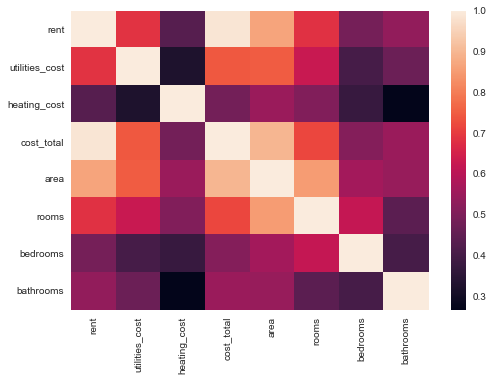

In [25]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from validation_metric import total_validation
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError


#load data
df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_preprocessed.csv")


_=sns.heatmap(df.iloc[:,1:9].corr())
plt.show()

# Drop 'cost_total' due to high correlation -> colliniarity?
df = df.drop('cost_total', axis=1)

# split data
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                 value
MAE              25.63
MAPE (%)         21.47
MSE            1192.79
RMSE (Units)     34.54
r-squared (%)    25.35


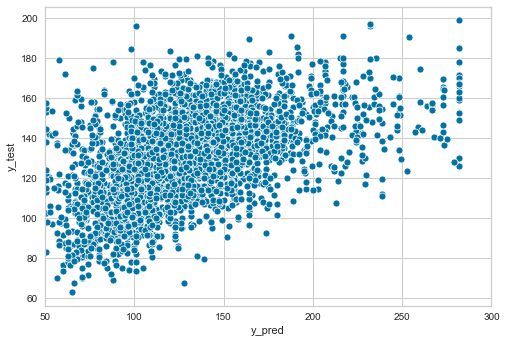

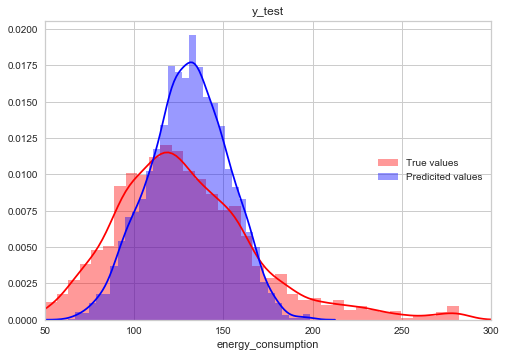

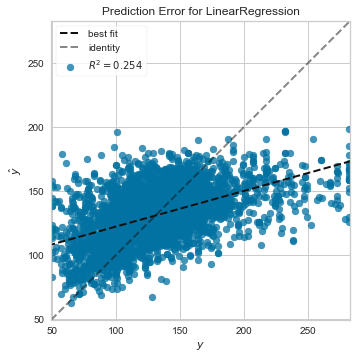

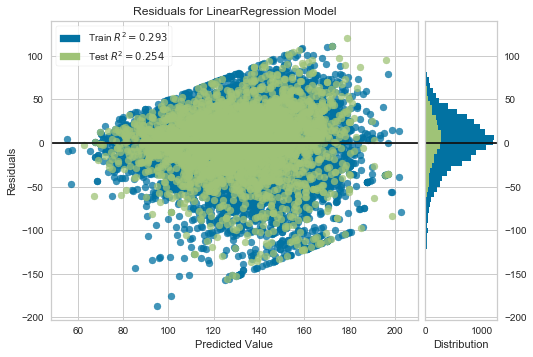

In [26]:
# LinReg:

from sklearn.linear_model import LinearRegression

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('LinReg', LinearRegression())]

pipeline = Pipeline(steps)

LinReg_scaled = pipeline.fit(X_train, y_train)
y_pred = LinReg_scaled.predict(X_test)

metric_LinReg = total_validation(y_test, y_pred)

print(metric_LinReg)


_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values') #, rug=True
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                 value
MAE              29.17
MAPE (%)         24.97
MSE            1481.24
RMSE (Units)     38.49
r-squared (%)     7.30


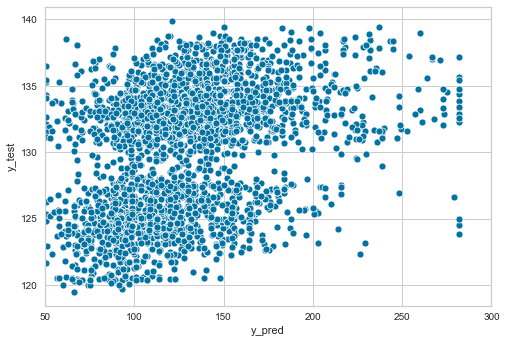

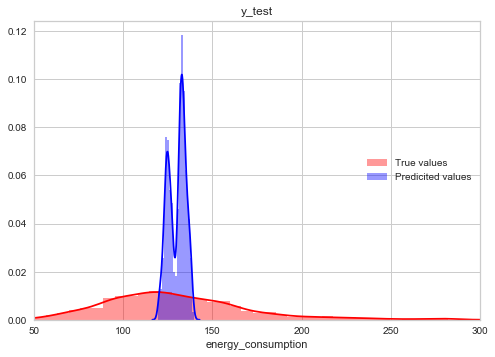

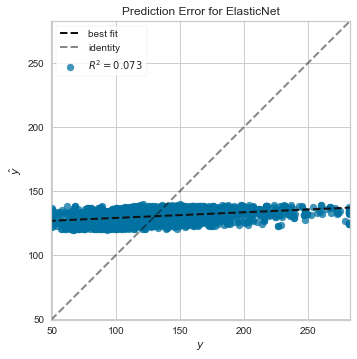

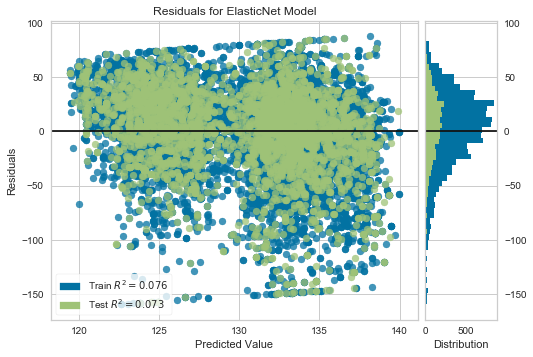

In [27]:
# ElasticNet:

from sklearn.linear_model import ElasticNet

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('ElasticNet', ElasticNet())] #Parameter checken. alpha=0.1, l1_ratio=0.5, tol=0.9

pipeline = Pipeline(steps)

ElasticNet_scaled = pipeline.fit(X_train, y_train)
y_pred = ElasticNet_scaled.predict(X_test)

metric_ElasticNet = total_validation(y_test, y_pred)

print(metric_ElasticNet)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                value
MAE             18.45
MAPE (%)        15.41
MSE            806.81
RMSE (Units)    28.40
r-squared (%)   49.51


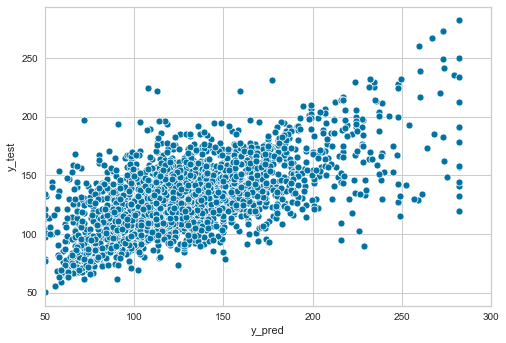

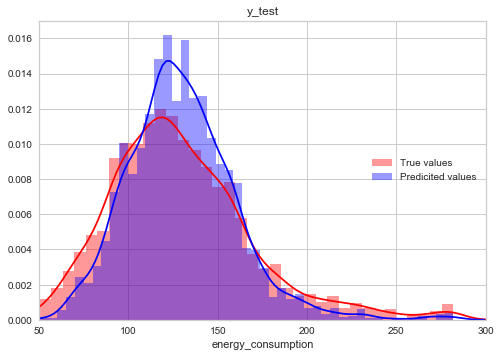

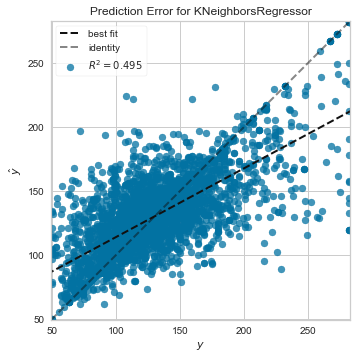

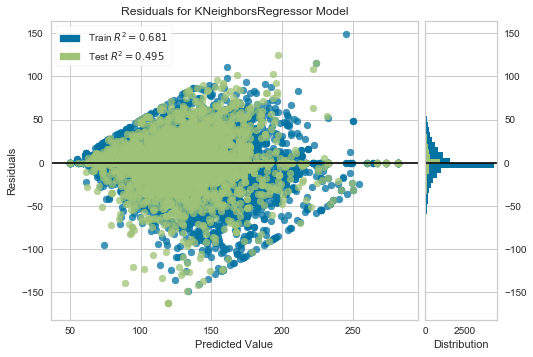

In [28]:
# K NeighborsReg:

from sklearn.neighbors import KNeighborsRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('KNReg', KNeighborsRegressor())]

pipeline = Pipeline(steps)

KNReg_scaled = pipeline.fit(X_train, y_train)
y_pred = KNReg_scaled.predict(X_test)

metric_KNReg = total_validation(y_test, y_pred)

print(metric_KNReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                 value
MAE              17.43
MAPE (%)         14.18
MSE            1064.15
RMSE (Units)     32.62
r-squared (%)    33.40


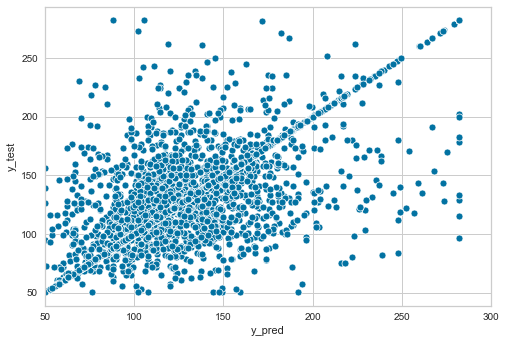

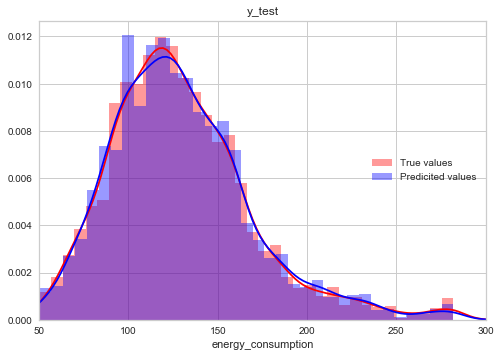

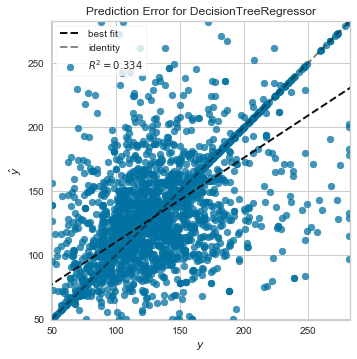

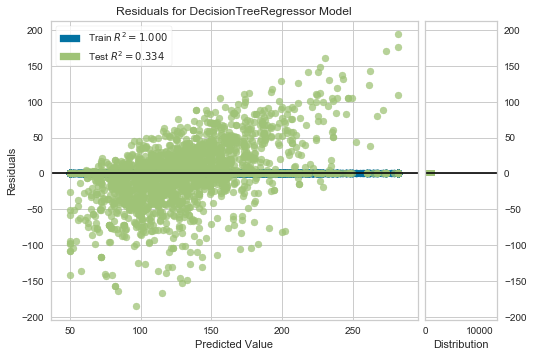

In [29]:
# DTReg:

from sklearn.tree import DecisionTreeRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('DTReg', DecisionTreeRegressor())]

pipeline = Pipeline(steps)

DTReg_scaled = pipeline.fit(X_train, y_train)
y_pred = DTReg_scaled.predict(X_test)

metric_DTReg = total_validation(y_test, y_pred)

print(metric_DTReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show()  

                 value
MAE              25.25
MAPE (%)         20.45
MSE            1261.96
RMSE (Units)     35.52
r-squared (%)    21.02


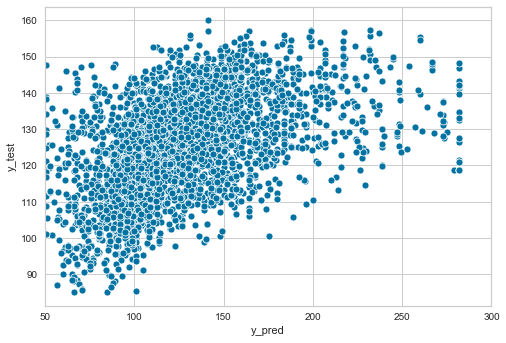

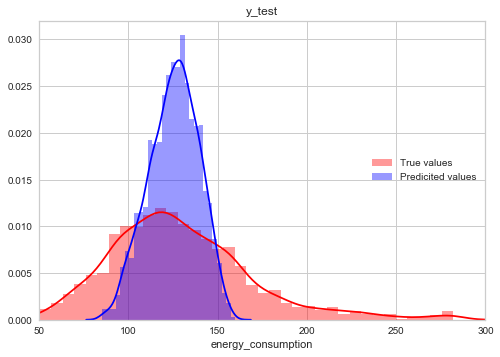

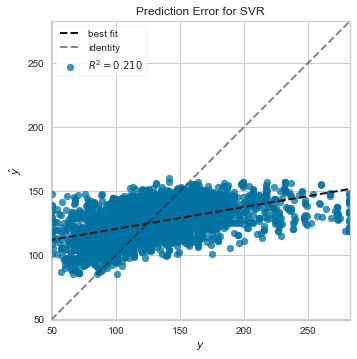

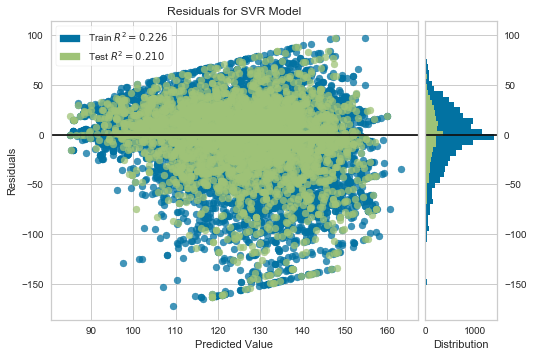

In [30]:
# SVMReg:

from sklearn.svm import SVR

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('SVMReg', SVR())]

pipeline = Pipeline(steps)

SVMReg_scaled = pipeline.fit(X_train, y_train)
y_pred = SVMReg_scaled.predict(X_test)

metric_SVMReg = total_validation(y_test, y_pred)

print(metric_SVMReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                value
MAE             17.15
MAPE (%)        14.42
MSE            702.88
RMSE (Units)    26.51
r-squared (%)   56.01


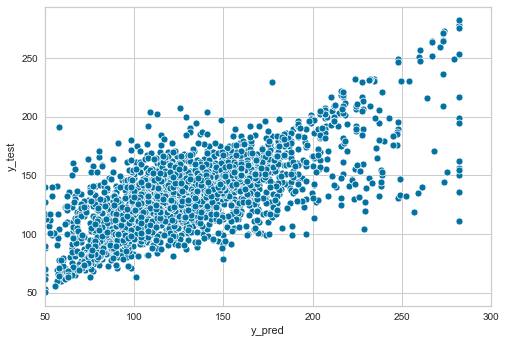

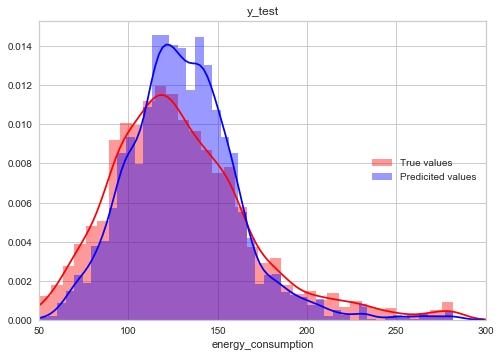

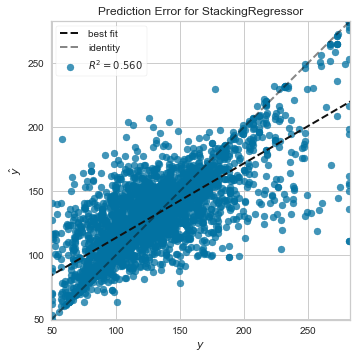

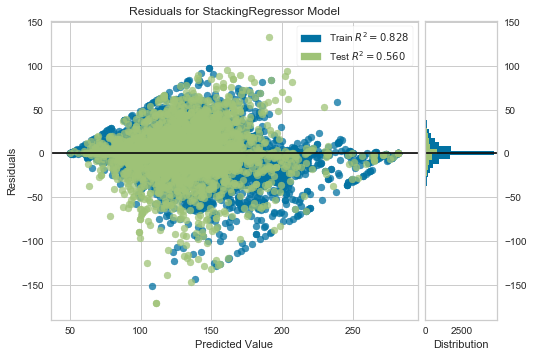

In [31]:
# Stacker:

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
    ('LinReg', LinearRegression()),
    ('ElasticNet', ElasticNet()),
    ('KNReg', KNeighborsRegressor()),
    ('DTReg', DecisionTreeRegressor(random_state=42)),
    ('SVMReg', SVR())
]

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('Stacker', StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(random_state=42)))]

pipeline = Pipeline(steps)

stacker_scaled = pipeline.fit(X_train, y_train)
y_pred = stacker_scaled.predict(X_test)

metric_Stacker = total_validation(y_test, y_pred)

print(metric_Stacker)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

In [32]:
metric_all = pd.concat([metric_LinReg, metric_ElasticNet, metric_KNReg, metric_DTReg, metric_SVMReg,metric_Stacker], axis=1)
metric_all.columns = ['LinReg','ElasticNet','KNReg','DTReg','SVMReg','Stacker']

print(metric_all)

                LinReg  ElasticNet   KNReg    DTReg   SVMReg  Stacker
MAE              25.63       29.17   18.45    17.43    25.25    17.15
MAPE (%)         21.47       24.97   15.41    14.18    20.45    14.42
MSE            1192.79     1481.24  806.81  1064.15  1261.96   702.88
RMSE (Units)     34.54       38.49   28.40    32.62    35.52    26.51
r-squared (%)    25.35        7.30   49.51    33.40    21.02    56.01


                value
MAE             14.62
MAPE (%)        12.25
MSE            530.73
RMSE (Units)    23.04
r-squared (%)   66.79


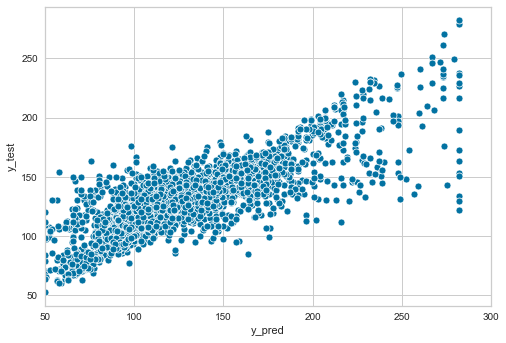

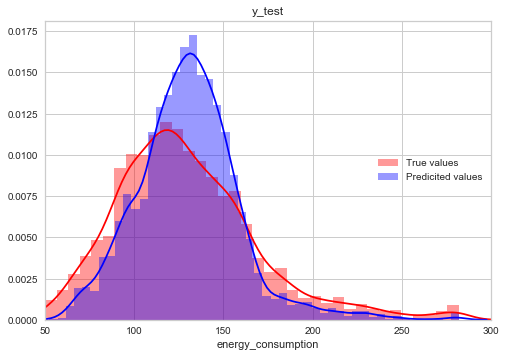

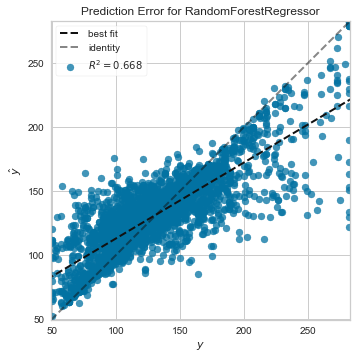

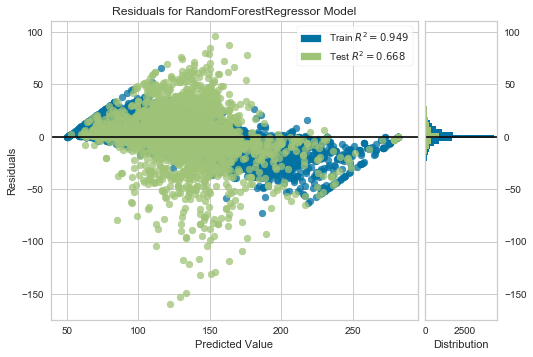

In [33]:
# RandomForestReg:

from sklearn.ensemble import RandomForestRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('RFReg', RandomForestRegressor(random_state=42))]

pipeline = Pipeline(steps)

RFReg_scaled = pipeline.fit(X_train, y_train)
y_pred = RFReg_scaled.predict(X_test)

metric_RFReg = total_validation(y_test, y_pred)

print(metric_RFReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 